In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (14, 10)

In [2]:
word = "inflation"

df = pd.read_csv(os.path.join("data", "all_daily_trends", "daily_trends0", word + ".csv"))
df["date"] = pd.to_datetime(df["date"] )
df.set_index("date", inplace=True)
df = df.resample("B").last()

df.head()

,inflation
date,
2004-01-01,41.0
2004-01-02,19.0
2004-01-05,0.0
2004-01-06,24.0
2004-01-07,32.0


<AxesSubplot:xlabel='date'>

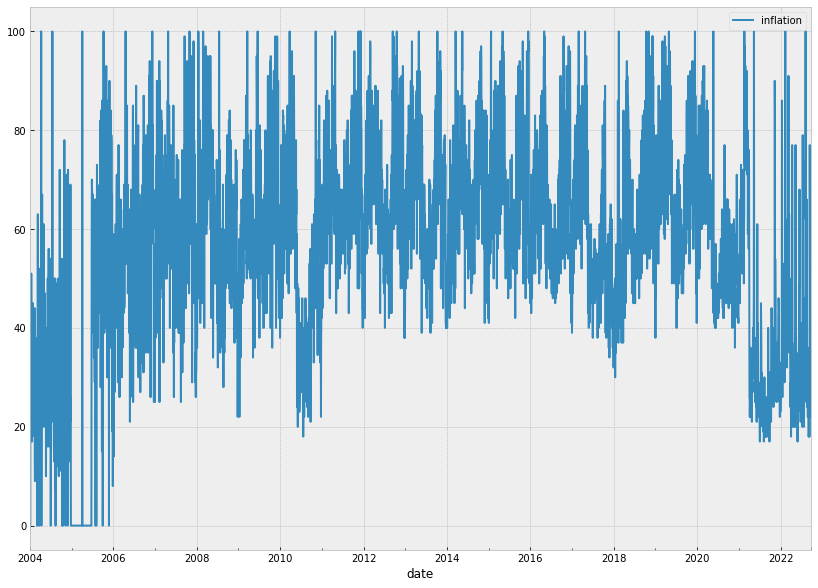

In [3]:
df.plot()

<AxesSubplot:xlabel='date'>

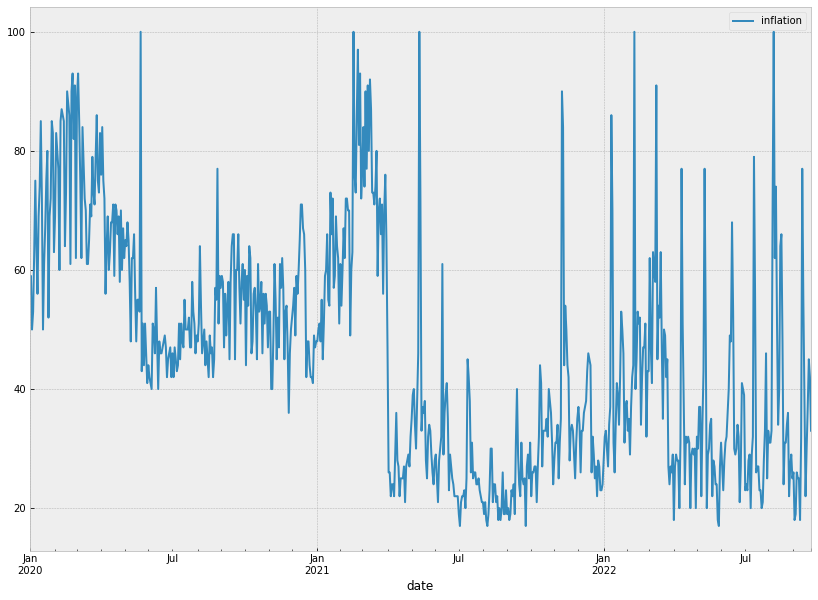

In [4]:
df.loc["2020-01-01":].plot()

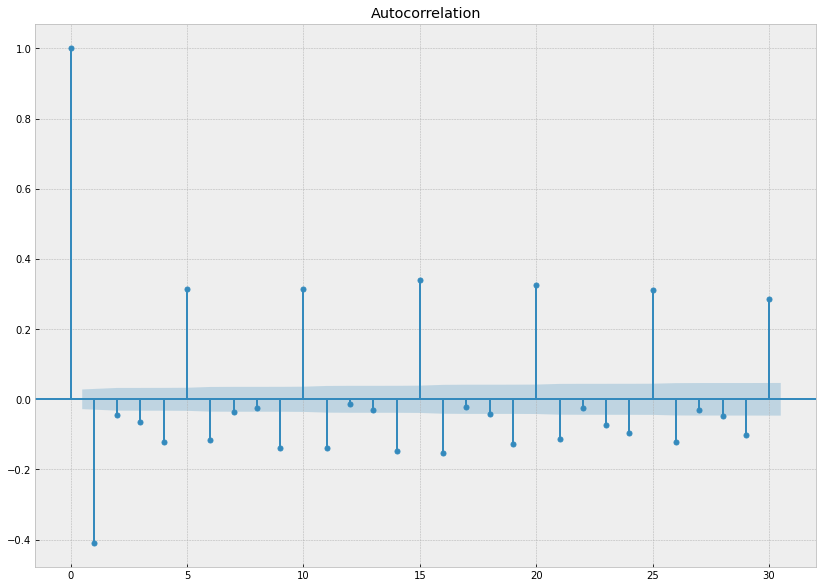

In [5]:
plot_acf(df[word].diff().dropna(), lags=30);

In [6]:
acf, confidence_interval = sm.tsa.acf(df[word].diff().dropna(), alpha=0.05, fft=False)

/Users/danieloliveira/opt/anaconda3/envs/dcuoliveira/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


In [7]:
acf[1:]

array([-0.40837463, -0.04581548, -0.06403402, -0.12060666,  0.31457793,
       -0.11650995, -0.0348215 , -0.02573452, -0.13769465,  0.31425322,
       -0.13943478, -0.01348579, -0.02959526, -0.14773846,  0.34074372,
       -0.15295366, -0.02094867, -0.04057443, -0.12687426,  0.32479877,
       -0.11404747, -0.02555469, -0.07337088, -0.09583041,  0.31052156,
       -0.12195397, -0.02920095, -0.04689567, -0.10129792,  0.28633048,
       -0.12273048, -0.04397455, -0.00050741, -0.11767972,  0.28642219,
       -0.1330828 , -0.01728319, -0.03916761, -0.09438907,  0.26370307])

In [8]:
confidence_interval[1:,1] - acf[1:]

array([0.02803957, 0.03237981, 0.03243074, 0.03252999, 0.03287968,
       0.03516646, 0.03546865, 0.03549552, 0.03551018, 0.03592751,
       0.03802726, 0.03842712, 0.03843084, 0.03844876, 0.03889252,
       0.04117278, 0.04161711, 0.0416254 , 0.04165649, 0.0419592 ,
       0.04389143, 0.0441238 , 0.04413544, 0.04423123, 0.04439417,
       0.04607018, 0.0463233 , 0.04633777, 0.04637507, 0.04654871,
       0.04791345, 0.04815998, 0.04819154, 0.04819155, 0.04841695,
       0.04973128, 0.05001049, 0.05001519, 0.0500393 , 0.05017909])

In [9]:
np.where(acf[1:] >= (confidence_interval[1:,1] - acf[1:]), acf[1:], 0)

array([0.        , 0.        , 0.        , 0.        , 0.31457793,
       0.        , 0.        , 0.        , 0.        , 0.31425322,
       0.        , 0.        , 0.        , 0.        , 0.34074372,
       0.        , 0.        , 0.        , 0.        , 0.32479877,
       0.        , 0.        , 0.        , 0.        , 0.31052156,
       0.        , 0.        , 0.        , 0.        , 0.28633048,
       0.        , 0.        , 0.        , 0.        , 0.28642219,
       0.        , 0.        , 0.        , 0.        , 0.26370307])

In [10]:
(confidence_interval[1:,0] - acf[1:])

array([-0.02803957, -0.03237981, -0.03243074, -0.03252999, -0.03287968,
       -0.03516646, -0.03546865, -0.03549552, -0.03551018, -0.03592751,
       -0.03802726, -0.03842712, -0.03843084, -0.03844876, -0.03889252,
       -0.04117278, -0.04161711, -0.0416254 , -0.04165649, -0.0419592 ,
       -0.04389143, -0.0441238 , -0.04413544, -0.04423123, -0.04439417,
       -0.04607018, -0.0463233 , -0.04633777, -0.04637507, -0.04654871,
       -0.04791345, -0.04815998, -0.04819154, -0.04819155, -0.04841695,
       -0.04973128, -0.05001049, -0.05001519, -0.0500393 , -0.05017909])

In [11]:
np.where(acf[1:] <= (confidence_interval[1:,0] - acf[1:]), acf[1:], 0)

array([-0.40837463, -0.04581548, -0.06403402, -0.12060666,  0.        ,
       -0.11650995,  0.        ,  0.        , -0.13769465,  0.        ,
       -0.13943478,  0.        ,  0.        , -0.14773846,  0.        ,
       -0.15295366,  0.        ,  0.        , -0.12687426,  0.        ,
       -0.11404747,  0.        , -0.07337088, -0.09583041,  0.        ,
       -0.12195397,  0.        , -0.04689567, -0.10129792,  0.        ,
       -0.12273048,  0.        ,  0.        , -0.11767972,  0.        ,
       -0.1330828 ,  0.        ,  0.        , -0.09438907,  0.        ])

## Log-tranformation and 1y lag difference

In [12]:
periods = 5

df[word + str(periods)] = np.log(df[word]).diff(periods=252).diff(periods=periods)

/Users/danieloliveira/opt/anaconda3/envs/dcuoliveira/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/danieloliveira/opt/anaconda3/envs/dcuoliveira/lib/python3.6/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


<AxesSubplot:xlabel='date'>

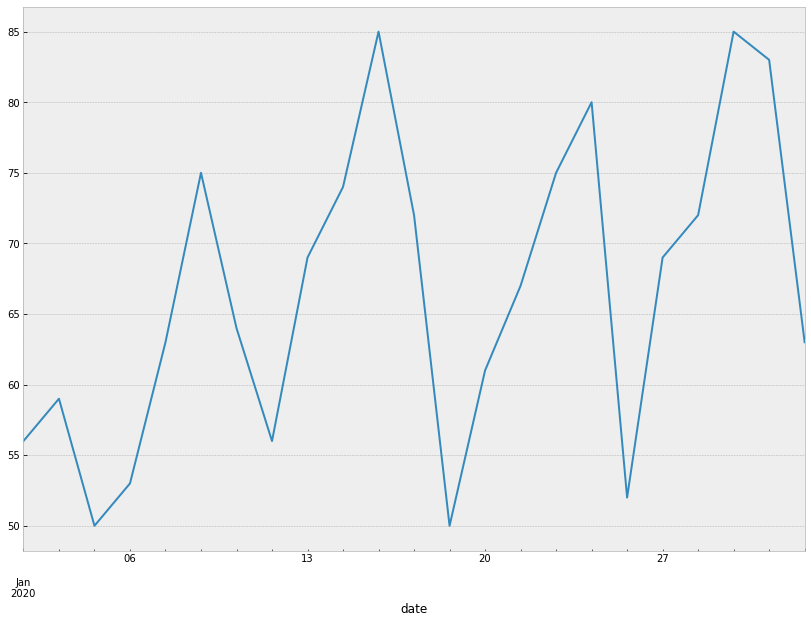

In [13]:
df[df.columns[0]].loc["2020-01-01":"2020-02-01"].plot()

<AxesSubplot:xlabel='date'>

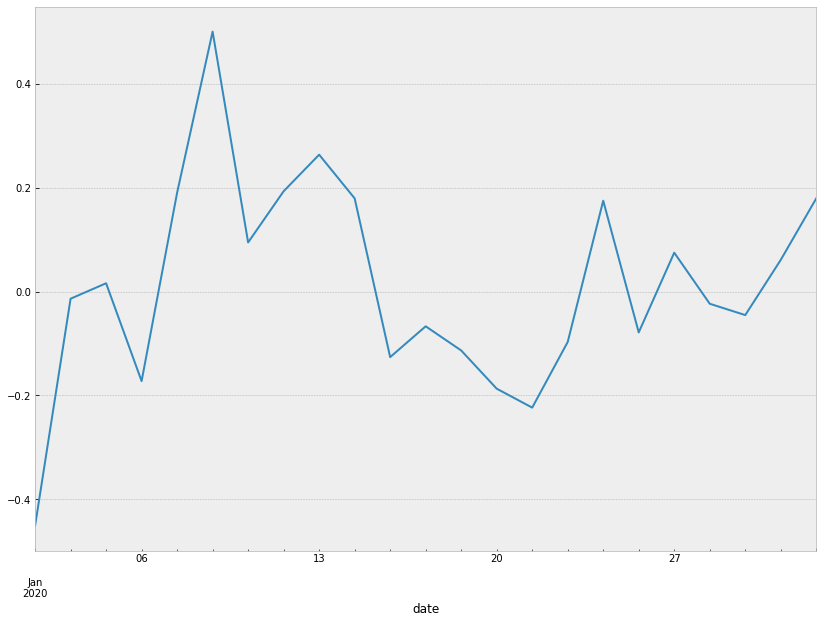

In [15]:
df[df.columns[1]].loc["2020-01-01":"2020-02-01"].plot()

<AxesSubplot:xlabel='date'>

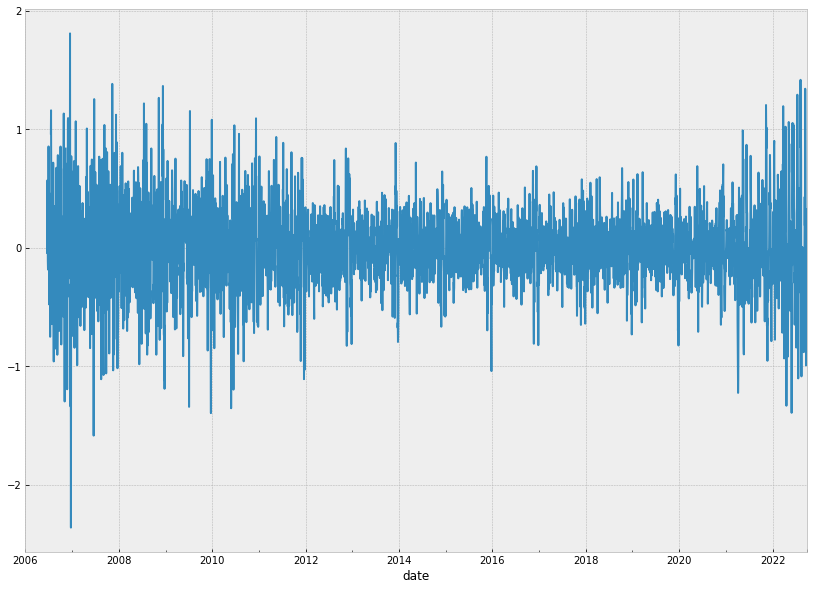

In [14]:
df[df.columns[1]].loc["2006-01-01":].plot()

In [19]:
df.loc["2007-01-01":].dropna()

,inflation,inflation5
date,,
2007-01-01,25.0,-0.054488
2007-01-02,49.0,-0.741521
2007-01-03,48.0,0.257650
2007-01-04,45.0,-0.049656
2007-01-05,38.0,-0.687316
...,...,...
2022-09-19,30.0,-0.279650
2022-09-20,37.0,-0.990717
2022-09-21,45.0,-0.162930
